In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Preprocessing

In [3]:
Data = pd.read_csv("/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv", encoding='latin1')
Data.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [5]:
# Ganti karakter koma dan ubah tipe data menjadi integer
Data['Gross'] = Data['Gross'].str.replace(',', '').astype(float)

Data['Runtime'] = Data['Runtime'].str.replace('min', '').astype(int)

# Cleaning and changing type rating columns from string to float64
# One product has the rating "|", so I searched amazon.in for its actual rating, wich was 3.9

# Update rating of this product
Data.loc[966, 'Released_Year'] = "1995"

# Changing type of rating column to float
Data['Released_Year'] = Data['Released_Year'].astype('int')

Data.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0


In [6]:
print("Null Values of Anime Dataset :")
Data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#deb522","color":"white","border": "1.5px  solid black"})

Null Values of Anime Dataset :


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,0,0,101,0,0,0,0,157,0,0,0,0,0,0,169


In [7]:
print("After Dropping, Null Values of Anime Dataset :")
Data.dropna(axis = 0, inplace = True)
Data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#deb522","color":"white","border": "1.5px  solid black"})

After Dropping, Null Values of Anime Dataset :


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    714 non-null    object 
 1   Series_Title   714 non-null    object 
 2   Released_Year  714 non-null    int64  
 3   Certificate    714 non-null    object 
 4   Runtime        714 non-null    int64  
 5   Genre          714 non-null    object 
 6   IMDB_Rating    714 non-null    float64
 7   Overview       714 non-null    object 
 8   Meta_score     714 non-null    float64
 9   Director       714 non-null    object 
 10  Star1          714 non-null    object 
 11  Star2          714 non-null    object 
 12  Star3          714 non-null    object 
 13  Star4          714 non-null    object 
 14  No_of_Votes    714 non-null    int64  
 15  Gross          714 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 94.8+ KB


# Summary

In [9]:
print(f"Summary of IMDB Dataset :")
Data.describe().T.style.set_properties(**{"background-color": "#deb522","color":"white","border": "1.5px  solid black"})

Summary of IMDB Dataset :


,count,mean,std,min,25%,50%,75%,max
Released_Year,714.000000,1995.735294,18.585196,1930.000000,1987.000000,2001.000000,2009.750000,2019.000000
Runtime,714.000000,123.715686,25.887535,72.000000,104.250000,120.000000,136.000000,238.000000
IMDB_Rating,714.000000,7.937115,0.293278,7.600000,7.700000,7.900000,8.100000,9.300000
Meta_score,714.000000,77.158263,12.401144,28.000000,70.000000,78.000000,86.000000,100.000000
No_of_Votes,714.000000,356134.823529,353901.127505,25229.000000,96009.750000,236602.500000,507792.250000,2343110.000000
Gross,714.000000,78513585.239496,114977950.330585,1305.000000,6157408.500000,34850145.500000,102464067.000000,936662225.000000


In [10]:
Data.describe(include=object).T.style.set_properties(**{"background-color": "#deb522","color":"solid black","border": "1.5px  solid black"})

,count,unique,top,freq
Poster_Link,714,714,"https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg",1
Series_Title,714,714,The Shawshank Redemption,1
Certificate,714,12,U,183
Genre,714,172,Drama,58
Overview,714,714,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",1
Director,714,402,Steven Spielberg,13
Star1,714,472,Tom Hanks,12
Star2,714,599,Emma Watson,7
Star3,714,626,Rupert Grint,5
Star4,714,671,Michael Caine,4


In [11]:
netflix_palette = ['#deb522', '#0c0b00', '#fcf7f7']

# Data Exploring

In [12]:
# Certificate Distribution
fig = px.histogram(Data.Certificate, x="Certificate", title="Certificate Distribution",color_discrete_sequence=["#deb522"])
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
# Rating Distribution
fig = px.histogram(Data.IMDB_Rating, x="IMDB_Rating", title="Rating Distribution",color_discrete_sequence=["#deb522"])
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
# Meta Score Distribution
fig = px.histogram(Data.Meta_score, x="Meta_score", title="Meta Score Distribution",color_discrete_sequence=["#deb522"])
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
genre = Data[["Genre"]]
genre["Genre"] = genre["Genre"].str.split(", | , | ,")
genre = genre.explode("Genre")
genre["Genre"] = genre["Genre"].str.title()

print(f'Total unique genres are {len(genre["Genre"].unique())}')
print(f'Occurances of unique genres :')
genre["Genre"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#deb522","color":"white","border": "1.5px  solid black"})

Total unique genres are 21
Occurances of unique genres :


Genre,Drama,Adventure,Comedy,Crime,Action,Thriller,Biography,Romance,Mystery,Animation,Sci-Fi,Fantasy,Family,History,War,Music,Horror,Sport,Western,Musical,Film-Noir
count,500,163,161,142,140,99,88,88,70,63,56,55,43,38,29,27,18,17,16,11,6


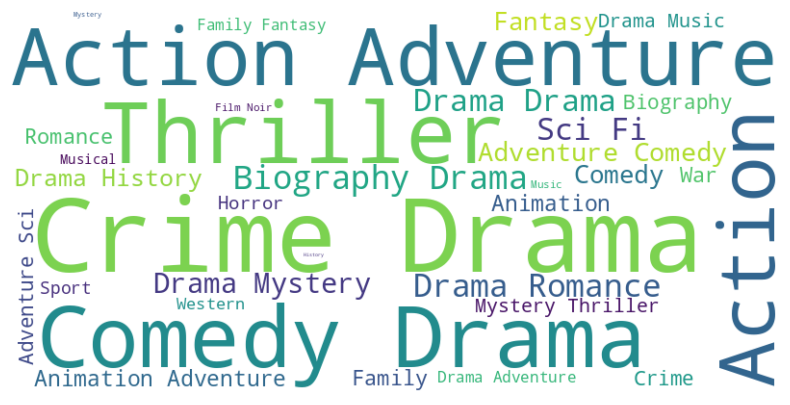

In [16]:
from wordcloud import WordCloud
# Most Movie's Genre

# Step 2: Preprocess the text
# Concatenate all text in the column
text = " ".join(Data['Genre'])

# Step 3: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Step 4: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
Data_top10 = Data.loc[0:9,]
fig = px.bar(Data_top10, x='Series_Title', y='IMDB_Rating',title="Top 10 Movie by IMDB Rating",color_discrete_sequence=["#deb522"])
fig.show()

In [18]:
# Urutkan DataFrame berdasarkan kolom 'Nilai'
Meta_sorted = Data.sort_values(by='Meta_score', ascending=False)

# Buat DataFrame baru dari data yang diurutkan
Data_meta = Meta_sorted.reset_index(drop=True)

Data_meta = Data_meta[Data_meta['Meta_score']==100]
fig = px.bar(Data_meta, x='Series_Title', y='Meta_score',title="Movie with Meta Score = 100",color_discrete_sequence=["#deb522"])
fig.show()


In [19]:
# Urutkan DataFrame berdasarkan kolom 'Nilai'
Gross_sorted = Data.sort_values(by='Gross', ascending=False)

# Buat DataFrame baru dari data yang diurutkan
Data_gross = Gross_sorted.reset_index(drop=True)

Data_gross = Data_gross.loc[0:9,]
fig = px.bar(Data_gross, x='Series_Title', y='Gross',title="Top 10 Movie by Gross",color_discrete_sequence=["#deb522"])
fig.show()

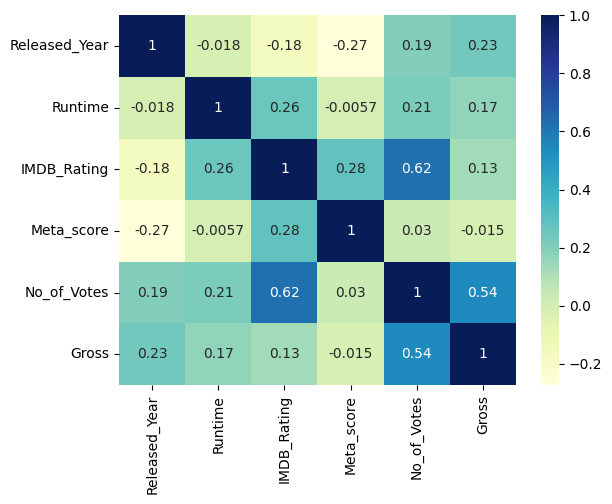

In [20]:
numeric_df = Data.select_dtypes(include=['int64', 'float64'])
# plotting correlation heatmap 
dataplot = sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

# Making Recommender System

## Content Based Filtering

In [21]:
Data['Overview'].head(5)

0    Two imprisoned men bond over a number of years...
1    An organized crime dynasty's aging patriarch t...
2    When the menace known as the Joker wreaks havo...
3    The early life and career of Vito Corleone in ...
4    A jury holdout attempts to prevent a miscarria...
Name: Overview, dtype: object

In [22]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
Data['Overview'] = Data['Overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(Data['Overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(714, 4437)

In [23]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(Data.index, index=Data['Series_Title']).drop_duplicates()

In [25]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(Series_Title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[Series_Title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return Data['Series_Title'].iloc[movie_indices]

In [26]:
get_recommendations('The Godfather')

463                             Knives Out
974                The Godfather: Part III
739                               Nebraska
628    The Curious Case of Benjamin Button
3                   The Godfather: Part II
543                         The Wild Bunch
618      The Hobbit: An Unexpected Journey
307                        Ace in the Hole
26                        La vita Ã¨ bella
841                        Ordinary People
Name: Series_Title, dtype: object

In [27]:
get_recommendations('The Hobbit: An Unexpected Journey')

378       The Incredibles
948            The Others
973            Home Alone
588             Le passÃ©
896    Hell or High Water
956                 Mulan
100     Bacheha-Ye aseman
566             King Kong
572            Forushande
631     Pride & Prejudice
Name: Series_Title, dtype: object

In [28]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    714 non-null    object 
 1   Series_Title   714 non-null    object 
 2   Released_Year  714 non-null    int64  
 3   Certificate    714 non-null    object 
 4   Runtime        714 non-null    int64  
 5   Genre          714 non-null    object 
 6   IMDB_Rating    714 non-null    float64
 7   Overview       714 non-null    object 
 8   Meta_score     714 non-null    float64
 9   Director       714 non-null    object 
 10  Star1          714 non-null    object 
 11  Star2          714 non-null    object 
 12  Star3          714 non-null    object 
 13  Star4          714 non-null    object 
 14  No_of_Votes    714 non-null    int64  
 15  Gross          714 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 111.0+ KB


In [29]:
# Print the new features of the first 3 films
Data[['Star1','Star2','Star3','Star4', 'Director', 'Certificate', 'Genre']].head(3)

,Star1,Star2,Star3,Star4,Director,Certificate,Genre
0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank Darabont,A,Drama
1,Marlon Brando,Al Pacino,James Caan,Diane Keaton,Francis Ford Coppola,A,"Crime, Drama"
2,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Christopher Nolan,UA,"Action, Crime, Drama"


In [30]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [31]:
# Apply clean_data function to your features.
features = ['Star1','Star2','Star3','Star4', 'Director', 'Certificate', 'Genre']

for feature in features:
    Data[feature] = Data[feature].apply(clean_data)

In [32]:
def create_soup(x):
    return x['Star1'] + ' ' + x['Star2'] + ' ' +x['Star3'] + ' ' +x['Star4'] + ' ' + x['Director'] + ' ' + x['Certificate'] + ' ' + ' '.join(x['Genre'])
Data['soup'] = Data.apply(create_soup, axis=1)

In [33]:
Data.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,soup
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,a,142,drama,9.3,Two imprisoned men bond over a number of years...,80.0,frankdarabont,timrobbins,morganfreeman,bobgunton,williamsadler,2343110,28341469.0,timrobbins morganfreeman bobgunton williamsadl...
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,a,175,"crime,drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,francisfordcoppola,marlonbrando,alpacino,jamescaan,dianekeaton,1620367,134966411.0,marlonbrando alpacino jamescaan dianekeaton fr...
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,ua,152,"action,crime,drama",9.0,When the menace known as the Joker wreaks havo...,84.0,christophernolan,christianbale,heathledger,aaroneckhart,michaelcaine,2303232,534858444.0,christianbale heathledger aaroneckhart michael...
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,a,202,"crime,drama",9.0,The early life and career of Vito Corleone in ...,90.0,francisfordcoppola,alpacino,robertdeniro,robertduvall,dianekeaton,1129952,57300000.0,alpacino robertdeniro robertduvall dianekeaton...
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,u,96,"crime,drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,sidneylumet,henryfonda,leej.cobb,martinbalsam,johnfiedler,689845,4360000.0,henryfonda leej.cobb martinbalsam johnfiedler ...
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,u,201,"action,adventure,drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,peterjackson,elijahwood,viggomortensen,ianmckellen,orlandobloom,1642758,377845905.0,elijahwood viggomortensen ianmckellen orlandob...
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,a,154,"crime,drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,quentintarantino,johntravolta,umathurman,samuell.jackson,brucewillis,1826188,107928762.0,johntravolta umathurman samuell.jackson brucew...
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,a,195,"biography,drama,history",8.9,"In German-occupied Poland during World War II,...",94.0,stevenspielberg,liamneeson,ralphfiennes,benkingsley,carolinegoodall,1213505,96898818.0,liamneeson ralphfiennes benkingsley carolinego...
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,ua,148,"action,adventure,sci-fi",8.8,A thief who steals corporate secrets through t...,74.0,christophernolan,leonardodicaprio,josephgordon-levitt,elliotpage,kenwatanabe,2067042,292576195.0,leonardodicaprio josephgordon-levitt elliotpag...
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,a,139,drama,8.8,An insomniac office worker and a devil-may-car...,66.0,davidfincher,bradpitt,edwardnorton,meatloaf,zachgrenier,1854740,37030102.0,bradpitt edwardnorton meatloaf zachgrenier dav...


In [34]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(Data['soup'])

In [35]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [36]:
# Reset index of our main DataFrame and construct reverse mapping as before
Data = Data.reset_index()
indices = pd.Series(Data.index, index=Data['Series_Title'])

In [37]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

2        The Dark Knight
19          Interstellar
113        Batman Begins
380              Dunkirk
32          The Prestige
145       Ford v Ferrari
266                  JFK
561    The Fifth Element
8              Inception
60               Memento
Name: Series_Title, dtype: object

In [38]:
get_recommendations('The Shawshank Redemption', cosine_sim2)

23          The Green Mile
25                   Se7en
337           Mystic River
459                  Glory
525    Lucky Number Slevin
569             Short Cuts
645         Gone Baby Gone
121             Unforgiven
156    Million Dollar Baby
1            The Godfather
Name: Series_Title, dtype: object